# Course project of "Python of Data Science" course

## Real Estate Price Prediction

### Description of project:
In this competition your task will be to predict the price of flats in test.csv. You will be given two datasets: train.csv (contains all features and prices of flats) and test.csv (only features).

In [216]:
import numpy as np
import pandas as pd
import random

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2

In [217]:
import warnings
warnings.filterwarnings('ignore')

In [218]:
matplotlib.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)

In [219]:
def evaluate_preds(train_true_values, train_pred_values, val_true_values, val_pred_values):
    """
    Function to evaluate the model
    Parameters:
    train_true_values - целевая переменная из тренировочной части датасета
    train_pred_values - предсказания модели по тренировочной части
    val_true_values - целевая переменная из валидационной части датасета
    val_pred_values - предсказания модели по валидационной части
    Returns:
    R2 на тренировочной и валидационной части, 
    графики зависимости истинных значений от предсказаний
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Valid R2:\t" + str(round(r2(val_true_values, val_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=val_pred_values, y=val_true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    
    plt.show()

### Path to folder and file

In [220]:
TRAIN_DATASET_PATH = 'datasets/project_task/train.csv'
TEST_DATASET_PATH = 'datasets/project_task/test.csv'
PREDICTIONS_PATH = 'datasets/project_task/Zhardemov_predictions.csv '

### Dataset loading
#### Data fields:
* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [221]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)

display(train_df.tail())
print(train_df.shape)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.402,30.476,5.0,6,5.0,1968,0.136,B,B,46,7960,6,350.0,3,11,B,196684.316
9996,6159,18,1.0,41.522,20.539,9.0,13,13.0,2000,0.000,B,B,30,5562,0,NaN,0,5,A,189050.290
9997,5123,27,1.0,47.939,NaN,1.0,12,16.0,2015,0.072,B,B,2,629,1,NaN,0,0,A,159143.805
9998,5400,75,2.0,43.603,33.840,8.0,1,5.0,1961,0.307,B,A,30,5048,9,325.0,2,5,B,181595.340
9999,6306,128,1.0,38.667,21.158,8.0,7,17.0,1990,0.000,B,B,27,4798,0,30.0,2,8,B,218714.078


(10000, 20)


In [222]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [223]:
# Change dtypes of"Id" and "DisctictId" from "int64" to "str"
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

# func for test dataset
def int64_to_str(df):
    df['Id'] = df['Id'].astype(str)
    df['DistrictId'] = df['DistrictId'].astype(str)
    return df

In [224]:
train_df.dtypes

Id                object
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

### Data overview

**Target variable**

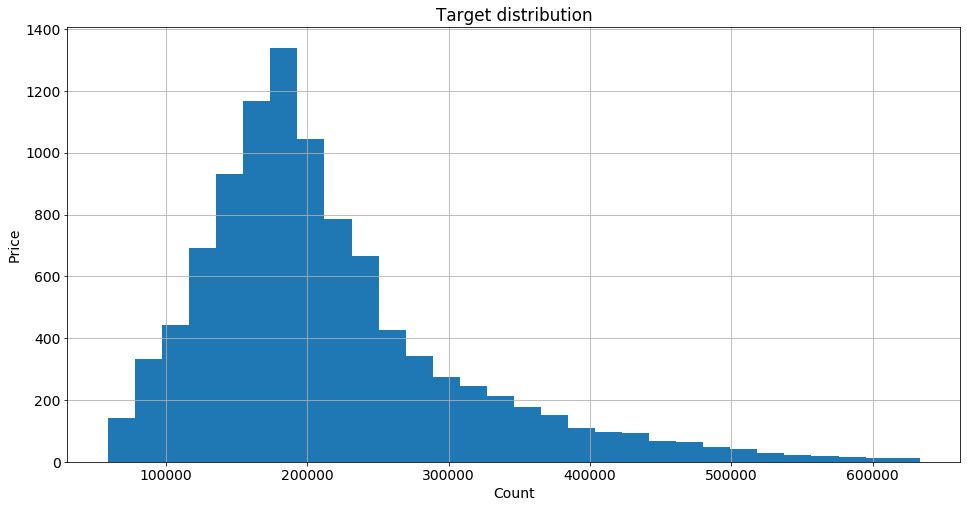

In [225]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)

plt.xlabel('Count')
plt.ylabel('Price')
plt.title('Target distribution')

plt.show()

**Descriptive statistics**

In [226]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,10000.0,1.891,0.840,0.000,1.000,2.000,2.000,1.900e+01
Square,10000.0,56.316,21.059,1.137,41.775,52.513,65.901,6.411e+02
LifeSquare,7887.0,37.200,86.241,0.371,22.770,32.781,45.129,7.481e+03
KitchenSquare,10000.0,6.273,28.561,0.000,1.000,6.000,9.000,2.014e+03
Floor,10000.0,8.527,5.241,1.000,4.000,7.000,12.000,4.200e+01
HouseFloor,10000.0,12.609,6.776,0.000,9.000,13.000,17.000,1.170e+02
HouseYear,10000.0,3990.166,200500.261,1910.000,1974.000,1977.000,2001.000,2.005e+07
Ecology_1,10000.0,0.119,0.119,0.000,0.018,0.075,0.196,5.219e-01
Social_1,10000.0,24.687,17.533,0.000,6.000,25.000,36.000,7.400e+01
Social_2,10000.0,5352.157,4006.800,168.000,1564.000,5285.000,7227.000,1.908e+04


**Categorical variables**

In [227]:
cat_colnames = train_df.select_dtypes(include='object').columns.tolist()

cat_colnames

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [228]:
for cat_colname in cat_colnames[2:]:
    print(str(cat_colname) + '\n\n' + str(train_df[cat_colname].value_counts()) + '\n' + '_' * 100 + '\n')

Ecology_2

B    9903
A      97
Name: Ecology_2, dtype: int64
____________________________________________________________________________________________________

Ecology_3

B    9725
A     275
Name: Ecology_3, dtype: int64
____________________________________________________________________________________________________

Shops_2

B    9175
A     825
Name: Shops_2, dtype: int64
____________________________________________________________________________________________________



### Data processing

**Rooms**

In [229]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [230]:
train_df.loc[train_df['Rooms'].isin([0, 10, 19]), 'Rooms'] = train_df['Rooms'].median()

# func for test dataset
def dp_rooms(df):
    df.loc[df['Rooms'].isin([0, 10, 19]), 'Rooms'] = df['Rooms'].median()
    return df

In [231]:
train_df['Rooms'].value_counts()

2.0    3891
1.0    3705
3.0    2235
4.0     150
5.0      18
6.0       1
Name: Rooms, dtype: int64

**Square, LifeSquare, KitchenSquare**

In [232]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000,10000.000,7887.000,10000.000,10000.000,10000.000,1.000e+04,10000.000,10000.000,10000.000,10000.000,5202.000,10000.000,10000.000,10000.000
mean,1.889,56.316,37.200,6.273,8.527,12.609,3.990e+03,0.119,24.687,5352.157,8.039,1142.904,1.319,4.231,214138.857
std,0.812,21.059,86.241,28.561,5.241,6.776,2.005e+05,0.119,17.533,4006.800,23.832,1021.517,1.494,4.806,92872.294
min,1.000,1.137,0.371,0.000,1.000,0.000,1.910e+03,0.000,0.000,168.000,0.000,0.000,0.000,0.000,59174.778
25%,1.000,41.775,22.770,1.000,4.000,9.000,1.974e+03,0.018,6.000,1564.000,0.000,350.000,0.000,1.000,153872.634
50%,2.000,52.513,32.781,6.000,7.000,13.000,1.977e+03,0.075,25.000,5285.000,2.000,900.000,1.000,3.000,192269.645
75%,2.000,65.901,45.129,9.000,12.000,17.000,2.001e+03,0.196,36.000,7227.000,5.000,1548.000,2.000,6.000,249135.462
max,6.000,641.065,7480.592,2014.000,42.000,117.000,2.005e+07,0.522,74.000,19083.000,141.000,4849.000,6.000,23.000,633233.467


In [233]:
train_df.loc[train_df['Square'] < 16, 'Square'] = train_df['Square'].median()
train_df.loc[train_df['Square'] > 400, 'Square'] = train_df['Square'].median()

# func for test dataset
def dp_square(df):
    df.loc[df['Square'] < 16, 'Square'] = df['Square'].median()
    df.loc[df['Square'] > 400, 'Square'] = df['Square'].median()
    return df

train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = train_df['LifeSquare'].median()
train_df.loc[train_df['LifeSquare'] < 10, 'LifeSquare'] = train_df['LifeSquare'].median()
train_df.loc[train_df['LifeSquare'] > 400, 'LifeSquare'] = train_df['LifeSquare'].median()

# func for test dataset
def dp_life_square(df):
    df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['LifeSquare'].median()
    df.loc[df['LifeSquare'] < 10, 'LifeSquare'] = df['LifeSquare'].median()
    df.loc[df['LifeSquare'] > 400, 'LifeSquare'] = df['LifeSquare'].median()
    return df

train_df.loc[train_df['KitchenSquare'] < 5, 'KitchenSquare'] = train_df['KitchenSquare'].median()
train_df.loc[train_df['KitchenSquare'] > 80, 'KitchenSquare'] = train_df['KitchenSquare'].median()

# func for test dataset
def dp_kitchen_square(df):
    df.loc[train_df['KitchenSquare'] < 5, 'KitchenSquare'] = df['KitchenSquare'].median()
    df.loc[train_df['KitchenSquare'] > 80, 'KitchenSquare'] = df['KitchenSquare'].median()
    return df

In [234]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,1.000e+04,10000.000,10000.000,10000.000,10000.000,5202.000,10000.000,10000.000,10000.000
mean,1.889,56.228,35.981,7.491,8.527,12.609,3.990e+03,0.119,24.687,5352.157,8.039,1142.904,1.319,4.231,214138.857
std,0.812,19.059,15.379,3.290,5.241,6.776,2.005e+05,0.119,17.533,4006.800,23.832,1021.517,1.494,4.806,92872.294
min,1.000,16.117,10.524,5.000,1.000,0.000,1.910e+03,0.000,0.000,168.000,0.000,0.000,0.000,0.000,59174.778
25%,1.000,41.800,27.655,6.000,4.000,9.000,1.974e+03,0.018,6.000,1564.000,0.000,350.000,0.000,1.000,153872.634
50%,2.000,52.513,32.781,6.000,7.000,13.000,1.977e+03,0.075,25.000,5285.000,2.000,900.000,1.000,3.000,192269.645
75%,2.000,65.890,41.415,9.000,12.000,17.000,2.001e+03,0.196,36.000,7227.000,5.000,1548.000,2.000,6.000,249135.462
max,6.000,275.645,263.542,78.000,42.000,117.000,2.005e+07,0.522,74.000,19083.000,141.000,4849.000,6.000,23.000,633233.467


**HouseFloor, Floor**

In [235]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [236]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [237]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

# func for test dataset
def dp_house_floor(df):
    df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()
    return df

In [238]:
floor_outliers = train_df[train_df['Floor'] > train_df['HouseFloor']].index

train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

# func for test dataset
def dp_floor(df):
    floor_outliers = df[df['Floor'] > df['HouseFloor']].index
    df.loc[floor_outliers, 'Floor'] = df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))
    return df

In [239]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,1.000e+04,10000.000,10000.000,10000.000,10000.000,5202.000,10000.000,10000.000,10000.000
mean,1.889,56.228,35.981,7.491,7.424,12.959,3.990e+03,0.119,24.687,5352.157,8.039,1142.904,1.319,4.231,214138.857
std,0.812,19.059,15.379,3.290,5.034,6.443,2.005e+05,0.119,17.533,4006.800,23.832,1021.517,1.494,4.806,92872.294
min,1.000,16.117,10.524,5.000,1.000,1.000,1.910e+03,0.000,0.000,168.000,0.000,0.000,0.000,0.000,59174.778
25%,1.000,41.800,27.655,6.000,3.000,9.000,1.974e+03,0.018,6.000,1564.000,0.000,350.000,0.000,1.000,153872.634
50%,2.000,52.513,32.781,6.000,6.000,13.000,1.977e+03,0.075,25.000,5285.000,2.000,900.000,1.000,3.000,192269.645
75%,2.000,65.890,41.415,9.000,11.000,17.000,2.001e+03,0.196,36.000,7227.000,5.000,1548.000,2.000,6.000,249135.462
max,6.000,275.645,263.542,78.000,42.000,117.000,2.005e+07,0.522,74.000,19083.000,141.000,4849.000,6.000,23.000,633233.467


**HouseYear**

In [240]:
train_df['HouseYear'].sort_values().unique()

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

In [241]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020
train_df.loc[train_df['HouseYear'] == 20052011, 'HouseYear'] = 2008

# func for test dataset
def dp_house_year(df):
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020
    df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = 2008
    return df

In [242]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,5202.000,10000.000,10000.000,10000.000
mean,1.889,56.228,35.981,7.491,7.424,12.959,1984.872,0.119,24.687,5352.157,8.039,1142.904,1.319,4.231,214138.857
std,0.812,19.059,15.379,3.290,5.034,6.443,18.416,0.119,17.533,4006.800,23.832,1021.517,1.494,4.806,92872.294
min,1.000,16.117,10.524,5.000,1.000,1.000,1910.000,0.000,0.000,168.000,0.000,0.000,0.000,0.000,59174.778
25%,1.000,41.800,27.655,6.000,3.000,9.000,1974.000,0.018,6.000,1564.000,0.000,350.000,0.000,1.000,153872.634
50%,2.000,52.513,32.781,6.000,6.000,13.000,1977.000,0.075,25.000,5285.000,2.000,900.000,1.000,3.000,192269.645
75%,2.000,65.890,41.415,9.000,11.000,17.000,2001.000,0.196,36.000,7227.000,5.000,1548.000,2.000,6.000,249135.462
max,6.000,275.645,263.542,78.000,42.000,117.000,2020.000,0.522,74.000,19083.000,141.000,4849.000,6.000,23.000,633233.467


### Missing variables data processing

In [243]:
train_df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

**Healthcare_1**

In [244]:
train_df['Healthcare_1'].head()

0       NaN
1     240.0
2     229.0
3    1084.0
4    2078.0
Name: Healthcare_1, dtype: float64

In [245]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median()

# func for test dataset
def dp_healtcare_1(df):
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()
    return df

In [246]:
train_df.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [247]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,1.889,56.228,35.981,7.491,7.424,12.959,1984.872,0.119,24.687,5352.157,8.039,1026.359,1.319,4.231,214138.857
std,0.812,19.059,15.379,3.290,5.034,6.443,18.416,0.119,17.533,4006.800,23.832,746.663,1.494,4.806,92872.294
min,1.000,16.117,10.524,5.000,1.000,1.000,1910.000,0.000,0.000,168.000,0.000,0.000,0.000,0.000,59174.778
25%,1.000,41.800,27.655,6.000,3.000,9.000,1974.000,0.018,6.000,1564.000,0.000,830.000,0.000,1.000,153872.634
50%,2.000,52.513,32.781,6.000,6.000,13.000,1977.000,0.075,25.000,5285.000,2.000,900.000,1.000,3.000,192269.645
75%,2.000,65.890,41.415,9.000,11.000,17.000,2001.000,0.196,36.000,7227.000,5.000,990.000,2.000,6.000,249135.462
max,6.000,275.645,263.542,78.000,42.000,117.000,2020.000,0.522,74.000,19083.000,141.000,4849.000,6.000,23.000,633233.467


### Creating the new data fields

**Dummies**

In [248]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

# func for test dataset
def dp_dummies(df):
    df['Ecology_2_bin'] = df['Ecology_2'].replace({'A':0, 'B':1})
    df['Ecology_3_bin'] = df['Ecology_3'].replace({'A':0, 'B':1})
    df['Shops_2_bin'] = df['Shops_2'].replace({'A':0, 'B':1})
    return df

In [249]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,1.889,56.228,35.981,7.491,7.424,12.959,1984.872,0.119,24.687,5352.157,8.039,1026.359,1.319,4.231,214138.857,0.990,0.973,0.917
std,0.812,19.059,15.379,3.290,5.034,6.443,18.416,0.119,17.533,4006.800,23.832,746.663,1.494,4.806,92872.294,0.098,0.164,0.275
min,1.000,16.117,10.524,5.000,1.000,1.000,1910.000,0.000,0.000,168.000,0.000,0.000,0.000,0.000,59174.778,0.000,0.000,0.000
25%,1.000,41.800,27.655,6.000,3.000,9.000,1974.000,0.018,6.000,1564.000,0.000,830.000,0.000,1.000,153872.634,1.000,1.000,1.000
50%,2.000,52.513,32.781,6.000,6.000,13.000,1977.000,0.075,25.000,5285.000,2.000,900.000,1.000,3.000,192269.645,1.000,1.000,1.000
75%,2.000,65.890,41.415,9.000,11.000,17.000,2001.000,0.196,36.000,7227.000,5.000,990.000,2.000,6.000,249135.462,1.000,1.000,1.000
max,6.000,275.645,263.542,78.000,42.000,117.000,2020.000,0.522,74.000,19083.000,141.000,4849.000,6.000,23.000,633233.467,1.000,1.000,1.000


### Create a model

In [250]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin']

target_name = 'Price'

**Seperate for train and val**

In [251]:
X = train_df[feature_names]
y = train_df[target_name]

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

**Train and validation of model**

In [253]:
gb_model = GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=21)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Train R2:	0.903
Valid R2:	0.738


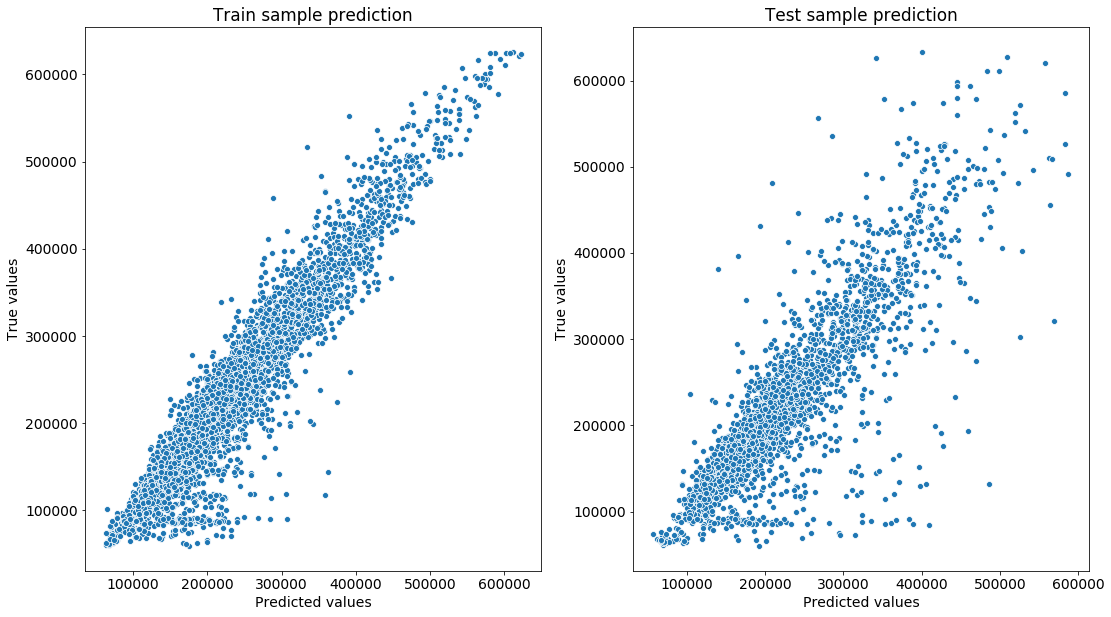

In [254]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

**Feature importance**

In [255]:
feature_importances = pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,4.230e-01
10,Social_1,1.264e-01
11,Social_2,7.251e-02
12,Social_3,7.171e-02
0,Rooms,6.520e-02
7,Ecology_1,5.054e-02
6,HouseYear,3.637e-02
13,Healthcare_1,3.230e-02
2,LifeSquare,2.887e-02
5,HouseFloor,2.784e-02


### Test dataset

In [256]:
test_df = pd.read_csv(TEST_DATASET_PATH)

display(test_df.tail())
print(test_df.shape)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.134,50.810,6.0,5,9.0,1973,1.697e-04,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198,21.807,10.0,12,17.0,2017,7.122e-03,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842,48.283,9.0,23,22.0,1989,9.080e-02,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305,NaN,0.0,4,0.0,1977,7.216e-02,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.556,NaN,1.0,10,17.0,1977,7.815e-05,B,B,22,6398,141,1046.0,3,23,B


(5000, 19)


In [257]:
train_df.dtypes

Id                object
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
Ecology_2_bin      int64
Ecology_3_bin      int64
Shops_2_bin        int64
dtype: object

In [258]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000,5000.000,5000.000,5000.000,3959.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,2623.000,5000.000,5000.000
mean,8412.595,51.279,1.910,56.450,36.159,5.977,8.632,12.601,1984.393,0.120,24.934,5406.900,8.263,1146.657,1.319,4.243
std,4832.674,44.179,0.839,19.093,17.825,9.950,5.483,6.789,18.573,0.120,17.532,4026.615,23.864,1044.744,1.480,4.777
min,1.000,0.000,0.000,1.379,0.333,0.000,1.000,0.000,1908.000,0.000,0.000,168.000,0.000,0.000,0.000,0.000
25%,4221.750,21.000,1.000,41.906,23.092,1.000,4.000,9.000,1973.000,0.020,6.000,1564.000,0.000,325.000,0.000,1.000
50%,8320.500,37.000,2.000,52.921,32.925,6.000,7.000,12.000,1977.000,0.072,25.000,5285.000,2.000,900.000,1.000,3.000
75%,12598.250,77.000,2.000,66.285,45.174,9.000,12.000,17.000,2000.000,0.196,36.000,7287.000,5.000,1548.000,2.000,6.000
max,16795.000,212.000,17.000,223.454,303.071,620.000,78.000,99.000,2020.000,0.522,74.000,19083.000,141.000,4849.000,6.000,23.000


In [259]:
# funt to prepare test dataset
def prepare_data(df):
    df = int64_to_str(df)
    df = dp_rooms(df)
    df = dp_square(df)
    df = dp_life_square(df)
    df = dp_kitchen_square(df)
    df = dp_house_floor(df)
    df = dp_floor(df)
    df = dp_house_year(df)
    dp = dp_healtcare_1(df)
    dp = dp_dummies(df)
    return df

**Test dataset processing**

In [260]:
test_df = prepare_data(test_df)

In [261]:
test_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.00,5000.000
mean,1.911,56.545,36.135,5.977,7.509,12.915,1984.393,0.120,24.934,5406.900,8.263,1029.396,1.319,4.243,0.990,0.97,0.918
std,0.838,18.955,15.177,9.950,5.137,6.469,18.573,0.120,17.532,4026.615,23.864,766.595,1.480,4.777,0.098,0.17,0.275
min,1.000,16.319,10.692,0.000,1.000,1.000,1908.000,0.000,0.000,168.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
25%,1.000,41.951,27.991,1.000,4.000,9.000,1973.000,0.020,6.000,1564.000,0.000,810.000,0.000,1.000,1.000,1.00,1.000
50%,2.000,52.923,32.925,6.000,6.000,12.000,1977.000,0.072,25.000,5285.000,2.000,900.000,1.000,3.000,1.000,1.00,1.000
75%,2.000,66.285,41.770,9.000,11.000,17.000,2000.000,0.196,36.000,7287.000,5.000,990.000,2.000,6.000,1.000,1.00,1.000
max,17.000,223.454,303.071,620.000,46.000,99.000,2020.000,0.522,74.000,19083.000,141.000,4849.000,6.000,23.000,1.000,1.00,1.000


**Predict price for test dataset**

In [265]:
test_df['Price'] = gb_model.predict(test_df.loc[:,feature_names])

In [266]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Price
0,725,58,2.0,49.883,33.433,6.0,6,14.0,1972,0.310,B,B,11,2748,1,900.0,0,0,B,1,1,1,165540.548
1,15856,74,2.0,69.263,32.925,1.0,1,1.0,1977,0.076,B,B,6,1437,3,900.0,0,2,B,1,1,1,201348.851
2,5480,190,1.0,52.921,15.948,12.0,2,5.0,1909,0.000,B,B,30,7538,87,4702.0,5,5,B,1,1,1,208562.865
3,15664,47,2.0,73.047,51.941,9.0,22,22.0,2007,0.102,B,B,23,4583,3,900.0,3,3,B,1,1,1,361107.130
4,14275,27,1.0,47.527,43.388,1.0,17,17.0,2017,0.072,B,B,2,629,1,900.0,0,0,A,1,1,0,138980.867


In [267]:
test_df.to_csv(PREDICTIONS_PATH, columns=['Id', 'Price'], index=False, encoding='utf-8')